In [213]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

#Cargamos el Dataset
file_path = "dataset/dataset.csv"
df = pd.read_csv(file_path)


In [214]:
#Listamos columnas para X y con drop separamos como un filter
X_columns = [
    'latitude_pos_tx', 'longitude_pos_tx', 'elevation_pos_tx', 'fc', 'elevation', 
    'azimuth', 'year', 'mmdd', 'UTI', 'hour', 'delay', 'terrestrial_range', 
    'slant_range', 'final_latitude', 'final_longitude', 'final_elevation'
]
X = df[X_columns]
Y = df.drop(columns=X_columns)

# Consideramos que las columnas "final_latitude", "final_longitude", "final_elevation"
# No corresponden a parametros de entradas X por lo que lo quitamos.
X = X.drop(columns=['final_latitude','final_longitude','final_elevation'])

#Nota: En Y tenemos 3 tipos(latitudes, longitudes, elevations)
#Generamos los nombres de las columnas. 
lat_columns = [f'lat_{i}' for i in range(1,101)]
long_columns = [f'long_{i}' for i in range(1,101)]
elev_columns = [f'elev_{i}' for i in range(1,101)]

#Teniendo los nombres de las columnas las filtro
latitudes = Y[lat_columns]
longitudes = Y[long_columns]
elevations = Y[elev_columns]
max_value = Y[elev_columns].max()
print("maximo valor por columnas\n",max_value)
print("Maximo valor del conjunto de elevaciones:",max_value.max())


maximo valor por columnas
 elev_1         967.773438
elev_2       11580.748895
elev_3       23228.155579
elev_4       34941.924124
elev_5       46721.758602
                ...      
elev_96     301178.222656
elev_97     302036.621094
elev_98     302895.019531
elev_99     303753.417969
elev_100    304611.816406
Length: 100, dtype: float64
Maximo valor del conjunto de elevaciones: 304611.8164061997


In [215]:
# Para convertir a Excel el df.
#df.to_excel("NuevoExcelCompleto_para_ver.xlsx", index = False)

In [216]:
#Contamos la cantidad de filas que tienen valores distintos de ceros en la columna elev_1
count_non_zero =(Y["elev_1"]!=0).sum()
print("La cantidad de filas con elev_1 != 0 es",count_non_zero)
count_non_zero_elev_100 = (Y["elev_100"]!=0).sum()
print("Cantidad de filas que no finalizan en cero: ", count_non_zero_elev_100)
elev_101 = np.array([])
for i in Y["elev_100"]:
  if i != 0:
    elev_101 = np.append(elev_101,1)
  else:
    elev_101 = np.append(elev_101,0)
print(elev_101,"cantidad: ", len(elev_101))
# Creamos un DataFrame de 0 y 1 para agregar un elev_101 PERO NO ES NECESARIO.
elev_101_df = pd.DataFrame()
elev_101_df["elev_101"] = elev_101
print(elev_101_df)
# Se probo que no es necesario ésta columna

La cantidad de filas con elev_1 != 0 es 280
Cantidad de filas que no finalizan en cero:  1519
[0. 0. 0. ... 1. 1. 1.] cantidad:  5130
      elev_101
0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
...        ...
5125       1.0
5126       1.0
5127       1.0
5128       1.0
5129       1.0

[5130 rows x 1 columns]


In [217]:
# Como la elevación inicial (elev_1) había que forzar el Cero en esa posición en toda la columna
Y["elev_1"] = Y["elev_1"].apply(lambda x: 0.0 if x != 0 else x)
print(Y["elev_1"].max().max())

0.0


In [218]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

print("Tipo de dato:",type(x_train),"\n", x_train.head())

Tipo de dato: <class 'pandas.core.frame.DataFrame'> 
       latitude_pos_tx  longitude_pos_tx  elevation_pos_tx          fc  \
1235           -42.28             -63.4                 0  10000000.0   
4047           -42.28             -63.4                 0  20000000.0   
949            -42.28             -63.4                 0  10000000.0   
4375           -42.28             -63.4                 0  23000000.0   
19             -42.28             -63.4                 0  10000000.0   

      elevation  azimuth    year  mmdd  UTI  hour     delay  \
1235          5       98  2010.0   725    0    20  0.009413   
4047         28       89  2010.0  1215    0    12  0.002455   
949           5       98  2010.0   608    0     4  0.009073   
4375         34       87  2010.0  1215    0    12  0.001921   
19            5       98  2010.0   104    0     4  0.009910   

      terrestrial_range   slant_range  
1235       2.719923e+06  2.822081e+06  
4047       6.188348e+05  7.360000e+05  
949     

In [219]:
count_non_zero_elev_100 = (y_train["elev_100"]!=0).sum()
print("Cantidad de filas que no finalizan en cero de y_train: ", count_non_zero_elev_100)


Cantidad de filas que no finalizan en cero de y_train:  1213


In [220]:
k = y_train[elev_columns].max().max()
print(k)
# Normalizo al numero máximo de todas las columnas de elevaciones de y_train
kilometro = 1000
y_train[elev_columns] = y_train[elev_columns]/kilometro
print(y_train[elev_columns].max())

# Normalizo al maximo del train en el test
y_test[elev_columns] = y_test[elev_columns]/kilometro
print("máximos en el test:",y_test[elev_columns].max().max())

304611.8164061997


elev_1        0.000000
elev_2       11.580749
elev_3       23.228156
elev_4       34.941924
elev_5       46.721759
               ...    
elev_96     301.178223
elev_97     302.036621
elev_98     302.895020
elev_99     303.753418
elev_100    304.611816
Length: 100, dtype: float64
máximos en el test: 304.5483398438003


In [221]:
# Normalizo a MHz las frecuencias de los x_train,x_test con un valor de k1 =1000000
k1 = 1000000
x_train["fc"] = x_train["fc"]/k1
x_test["fc"] = x_test["fc"]/k1
x_test.head()

,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc,elevation,azimuth,year,mmdd,UTI,hour,delay,terrestrial_range,slant_range
5104,-42.28,-63.4,0,30.0,30,91,2010.0,1215,0,12,0.002028,5.022289e+05,6.080000e+05
2186,-42.28,-63.4,0,10.0,5,98,2010.0,1231,0,8,0.004754,1.400465e+06,1.425179e+06
4371,-42.28,-63.4,0,23.0,32,88,2010.0,1215,0,12,0.002028,4.914956e+05,6.080000e+05
831,-42.28,-63.4,0,10.0,5,98,2010.0,519,0,12,0.004826,1.421357e+06,1.446764e+06
1421,-42.28,-63.4,0,10.0,5,98,2010.0,825,0,20,0.008627,2.493939e+06,2.586393e+06


Máximo en columna 'delay': 0.0199453239441
Máximo en columna 'terrestrial_range': 5667054.345030024
Máximo en columna 'slant_range': 5979458.984375


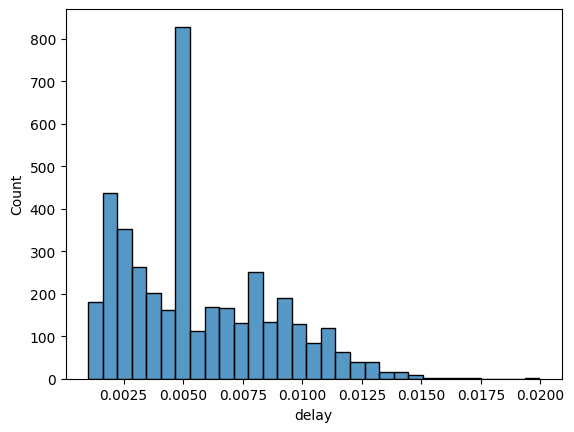

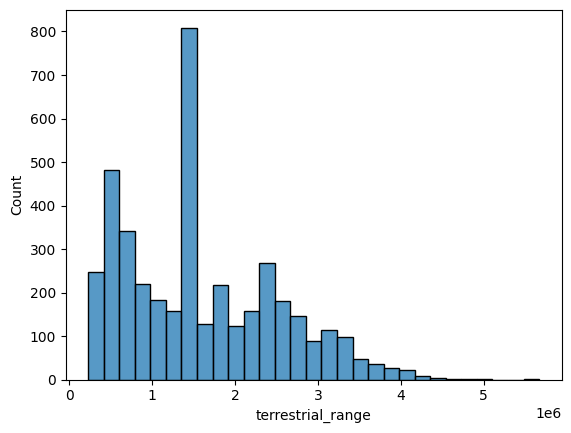

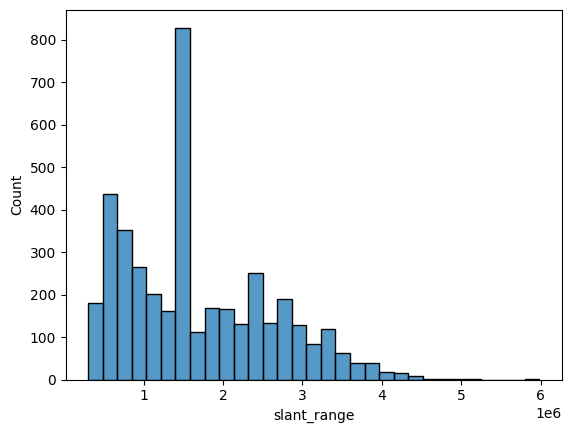

In [222]:

hist_columns = ["delay","terrestrial_range","slant_range"]
for col in x_train.columns:
  if col in hist_columns:
    plt.figure()
    sns.histplot(x_train[col])
print("Máximo en columna 'delay':",x_train["delay"].max())
print("Máximo en columna 'terrestrial_range':",x_train["terrestrial_range"].max())
print("Máximo en columna 'slant_range':",x_train["slant_range"].max())
# Observamos que se los puede estandarizar o normalizar por lo pronto vamos a eliminar estas columnas de mi x_train, x_test


In [223]:
# eliminación de las columnas "delay","terrestrial_range","slant_range"
drop_columns = hist_columns
x_train = x_train.drop(columns = drop_columns)
x_test = x_test.drop(columns = drop_columns)
x_train.head()


,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc,elevation,azimuth,year,mmdd,UTI,hour
1235,-42.28,-63.4,0,10.0,5,98,2010.0,725,0,20
4047,-42.28,-63.4,0,20.0,28,89,2010.0,1215,0,12
949,-42.28,-63.4,0,10.0,5,98,2010.0,608,0,4
4375,-42.28,-63.4,0,23.0,34,87,2010.0,1215,0,12
19,-42.28,-63.4,0,10.0,5,98,2010.0,104,0,4


In [224]:
# Redondeamos a 6 decimas los y_train, y_test
#LUEGO CONSULTAR SI ES NECESARIO NORMALIZAR/ESTANDARIZAR los parametros de X
y_train = y_train.round(6)
y_test = y_test.round(6)



In [225]:

x_train.head()

,latitude_pos_tx,longitude_pos_tx,elevation_pos_tx,fc,elevation,azimuth,year,mmdd,UTI,hour
1235,-42.28,-63.4,0,10.0,5,98,2010.0,725,0,20
4047,-42.28,-63.4,0,20.0,28,89,2010.0,1215,0,12
949,-42.28,-63.4,0,10.0,5,98,2010.0,608,0,4
4375,-42.28,-63.4,0,23.0,34,87,2010.0,1215,0,12
19,-42.28,-63.4,0,10.0,5,98,2010.0,104,0,4


In [226]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


In [227]:
inputs = Input(shape=(10,))
encoded = Dense(8, activation='relu')(inputs)  # Compresión 8
# encoded = Dense(32, activation='relu')(encoded)
# decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(300, activation='linear')(encoded)  # Reconstrucción a 100 puntos

autoencoder = Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 300)            │         2,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,788 (10.89 KB)

 Trainable params: 2,788 (10.89 KB)

 Non-trainable params: 0 (0.00 B)

In [228]:
# Entremamiento del modelo
history = autoencoder.fit(x_train,y_train,epochs=70, batch_size=60, validation_data = (x_test,y_test))
# epochs=50 batch_size=32   INICIAL

# # Evaluación si lo realizo por separado.
# loss = autoencoder.evaluate(x_test, y_test)
# print(f"Pérdida en datos de prueba: {loss}")
# # Predicciones
# predicciones = autoencoder.predict(x_test)

Epoch 1/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 14455.3623 - val_loss: 3911.9260
Epoch 2/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 3039.9807 - val_loss: 1700.0524
Epoch 3/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1665.2405 - val_loss: 1551.4993
Epoch 4/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1572.1975 - val_loss: 1516.6163
Epoch 5/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1542.4172 - val_loss: 1497.2932
Epoch 6/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1536.5836 - val_loss: 1483.3135
Epoch 7/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1501.2219 - val_loss: 1470.5818
Epoch 8/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1507.0189 - val_loss: 1461.0781
Epoch 9/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1497.6434 - val_loss: 1459.3647
Epoch 10/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1489.6835 - val_loss: 1448.8646
Epoch 11/70
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1475.1010 - val_loss: 1440.6224
Epoch 1

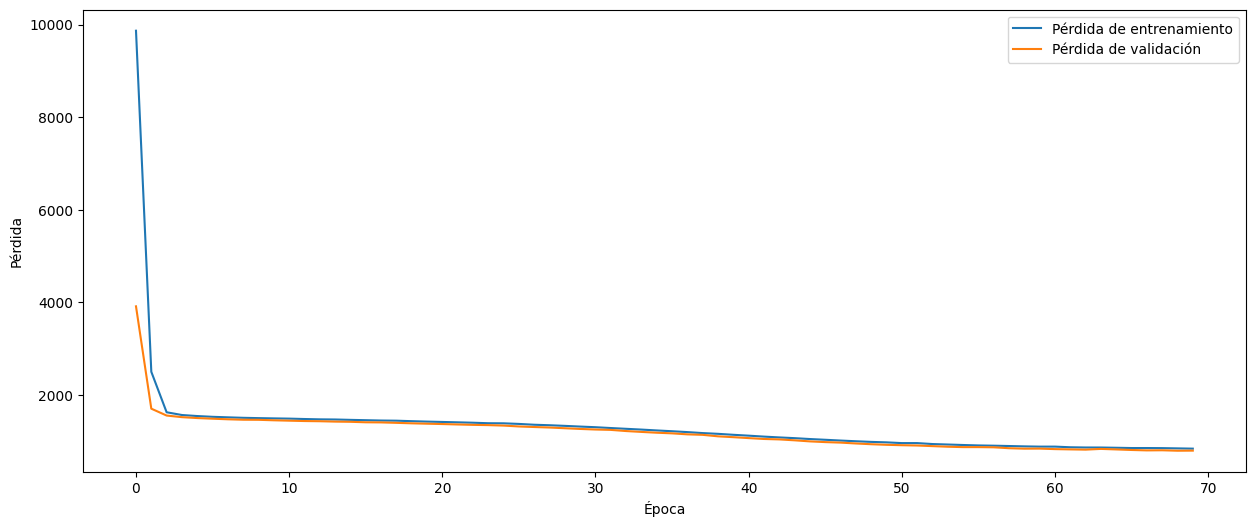

In [229]:
import matplotlib.pyplot as plt

# Graficar la función de pérdida durante el entrenamiento
plt.figure(figsize=(15, 6))
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

In [230]:
# Evaluar el modelo en los datos de prueba
loss = autoencoder.evaluate(x_test, y_test)
print(f'Pérdida en datos de prueba: {loss}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 806.5245
Pérdida en datos de prueba: 793.2763061523438


In [231]:
# Realizar predicciones con el conjunto de prueba
predicciones = autoencoder.predict(x_test)

# Mostrar una predicción
print(type(predicciones))
print(predicciones)  # Muestra los primeros 100 puntos predichos

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
<class 'numpy.ndarray'>
[[-42.04988    -42.30125    -42.17344    ... 222.93066    221.38828
  220.35231   ]
 [-42.194416   -42.2544     -42.262634   ...  -4.5210958   -2.087029
   -0.54722667]
 [-42.22918    -42.020042   -42.25593    ... 182.74423    182.65112
  181.42212   ]
 ...
 [-42.11673    -41.866497   -42.172115   ... -24.622787   -24.822416
  -24.482046  ]
 [-42.308693   -42.509758   -42.476006   ...  68.04024     64.814606
   64.46943   ]
 [-42.323208   -42.251457   -42.363087   ... -66.36894    -62.890865
  -60.82      ]]


In [232]:
y_test.head()

,lat_1,lat_2,lat_3,lat_4,lat_5,lat_6,lat_7,lat_8,lat_9,lat_10,...,elev_91,elev_92,elev_93,elev_94,elev_95,elev_96,elev_97,elev_98,elev_99,elev_100
5104,-42.28,-42.280740,-42.281479,-42.282218,-42.282958,-42.283697,-42.284285,-42.284833,-42.285381,-42.285929,...,274.761941,277.656285,280.550628,283.444972,286.343814,289.259524,292.175234,295.090944,298.006653,300.922363
2186,-42.28,-42.282720,-42.284985,-42.284978,-42.285874,-42.288579,-42.297927,-42.313917,-42.333036,-42.353721,...,0.453347,0.454679,0.391468,0.199174,0.079723,0.033114,0.014382,0.009588,0.004794,0.000000
4371,-42.28,-42.278190,-42.276380,-42.274569,-42.272759,-42.270940,-42.268950,-42.266960,-42.264971,-42.262981,...,287.911932,290.723149,293.534367,296.345585,299.156802,299.317417,299.338527,299.359636,299.380746,299.401855
831,-42.28,-42.282670,-42.284986,-42.284978,-42.285674,-42.288329,-42.296150,-42.311844,-42.329972,-42.350273,...,0.526900,0.338690,0.239874,0.241181,0.180462,0.079037,0.042051,0.028197,0.014116,0.000000
1421,-42.28,-42.284483,-42.284976,-42.288429,-42.307402,-42.338016,-42.371590,-42.404114,-42.435583,-42.466004,...,10.683993,7.254064,3.950378,1.552705,0.688733,0.515147,0.180087,0.002244,0.001317,0.000000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


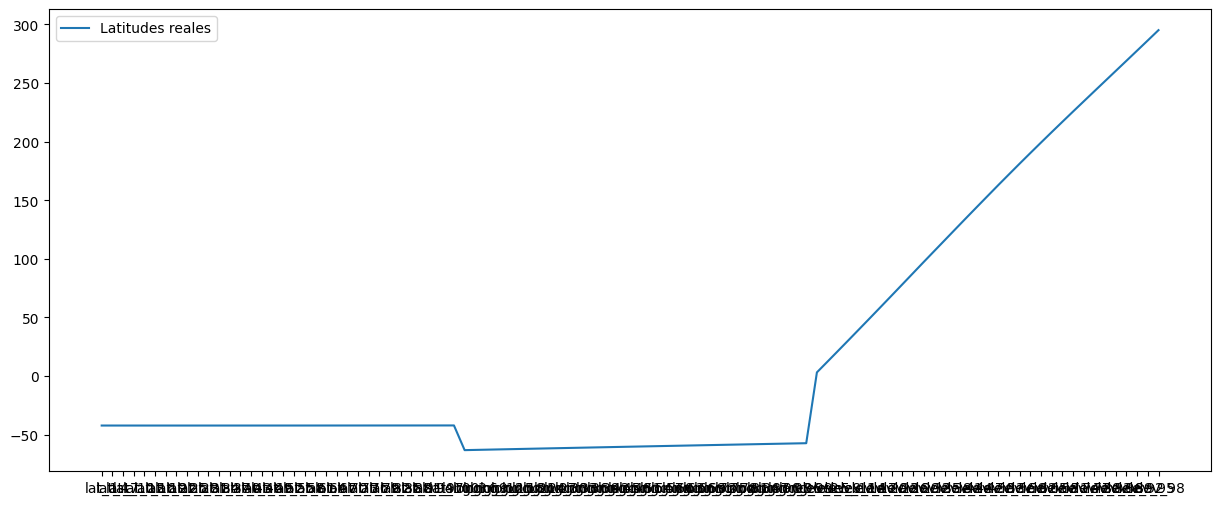

In [233]:
import matplotlib.pyplot as plt

idx = 0  # Elegir una muestra para comparar
y_pred = autoencoder.predict(np.expand_dims(x_test.iloc[idx], axis=0))  # Predicción de una muestra
y_true = y_test.iloc[idx]  # Valores reales de esa muestra

# Graficar las predicciones contra los valores reales (por ejemplo, latitudes)
plt.figure(figsize=(15, 6))
plt.plot(y_true[::3], label='Latitudes reales')
# plt.plot(y_pred[::3], label='Latitudes predichas')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


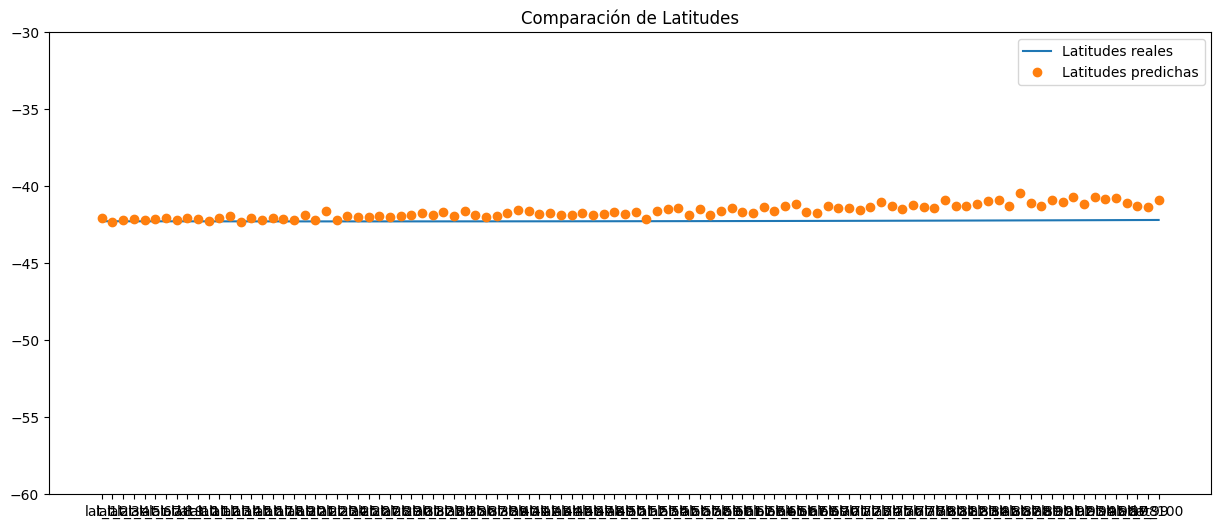

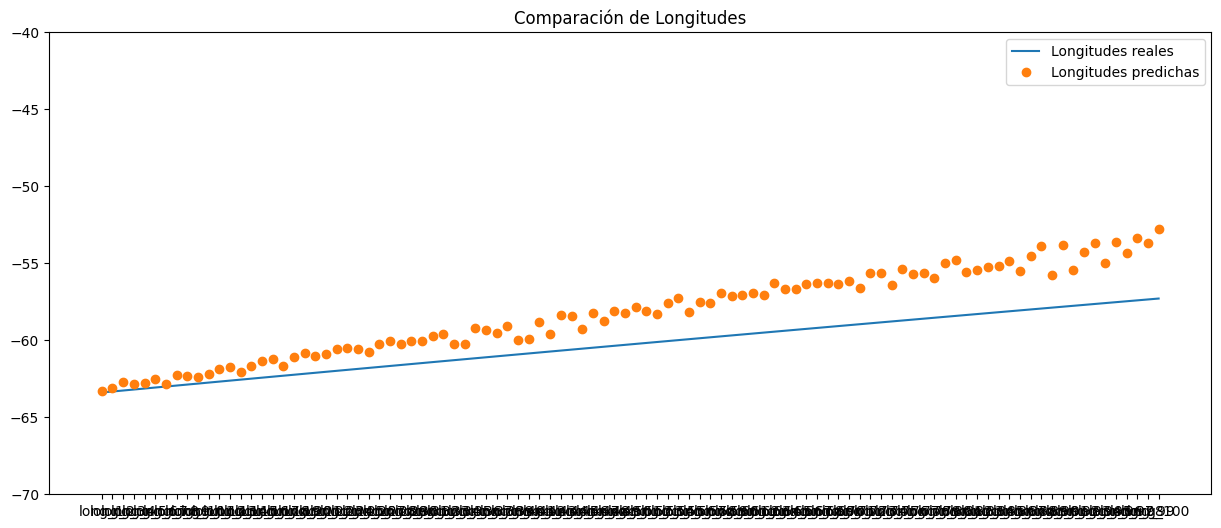

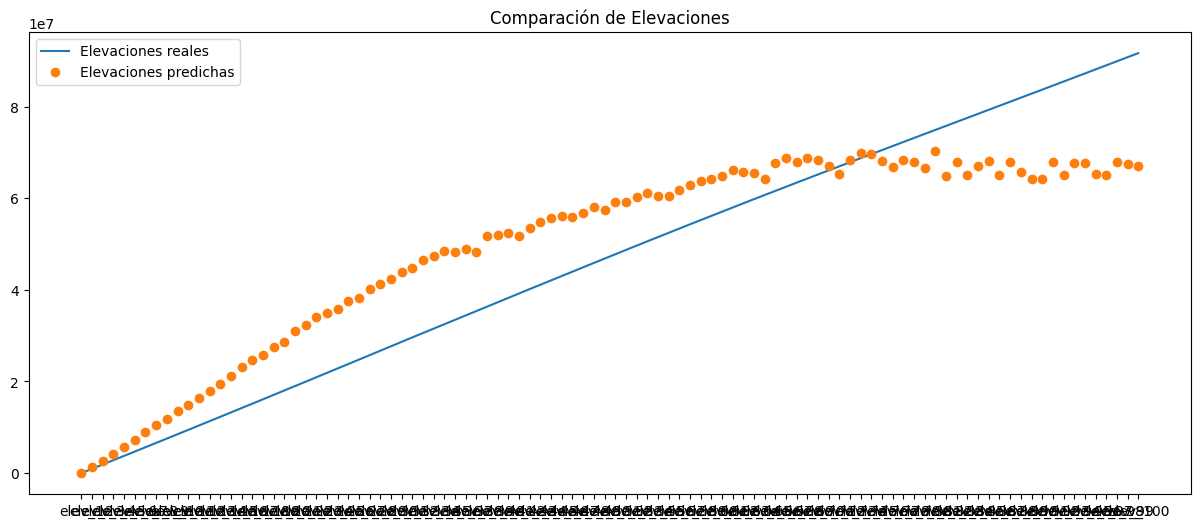

In [237]:
import matplotlib.pyplot as plt

idx = 0  # Elegir una muestra para comparar

# Predicción de una muestra
y_pred = autoencoder.predict(np.expand_dims(x_test.iloc[idx], axis=0))

# Valores reales de esa muestra
y_true = y_test.iloc[idx]

# Separar latitudes, longitudes y elevaciones
y_true_latitudes = y_true[:100]      # Primeras 100 columnas son latitudes
y_true_longitudes = y_true[100:200]  # Columnas 101 a 200 son longitudes
y_true_elevations = y_true[200:300]  # Últimas 100 columnas son elevaciones

y_pred_latitudes = y_pred[0, :100]      # Primeras 100 columnas predichas
y_pred_longitudes = y_pred[0, 100:200]  # Columnas 101 a 200 predichas
y_pred_elevations = y_pred[0, 200:300]  # Últimas 100 columnas predichas

# Graficar las predicciones contra los valores reales

# Latitudes
plt.figure(figsize=(15, 6))
plt.plot(y_true_latitudes, label='Latitudes reales')
plt.plot(y_pred_latitudes, label='Latitudes predichas', linestyle = 'None',marker='o')
plt.title('Comparación de Latitudes')
plt.ylim(-60,-30)
plt.legend()
plt.show()

# Longitudes
plt.figure(figsize=(15, 6))
plt.plot(y_true_longitudes, label='Longitudes reales')
plt.plot(y_pred_longitudes, label='Longitudes predichas', linestyle = 'None',marker='o') #linestyl e= dashed
plt.title('Comparación de Longitudes')
plt.ylim(-70,-40)
plt.legend()
plt.show()

# Elevaciones
plt.figure(figsize=(15, 6))
plt.plot(k*y_true_elevations, label='Elevaciones reales')
plt.plot(k*y_pred_elevations, label='Elevaciones predichas', linestyle = 'None',marker='o')
plt.ylim()
plt.title('Comparación de Elevaciones')
plt.legend()
plt.show()

In [235]:
y_pred[0,200:300]


array([ 6.61030412e-02,  7.32104421e-01,  1.77524161e+00,  2.70459390e+00,
        4.30086136e+00,  6.37833309e+00,  8.39456749e+00,  1.06043921e+01,
        1.22057486e+01,  1.43999720e+01,  1.72578678e+01,  1.99512291e+01,
        2.29697361e+01,  2.56533585e+01,  2.83757687e+01,  3.11700668e+01,
        3.38184280e+01,  3.76004601e+01,  4.05920715e+01,  4.38196754e+01,
        4.63247261e+01,  5.00953484e+01,  5.28408318e+01,  5.71784134e+01,
        6.11381454e+01,  6.39581871e+01,  6.70614548e+01,  7.00937347e+01,
        7.37993011e+01,  7.70846939e+01,  8.01293030e+01,  8.36466980e+01,
        8.47460938e+01,  8.90949478e+01,  9.09532471e+01,  9.75069733e+01,
        1.00889366e+02,  1.04996849e+02,  1.04592392e+02,  1.08876740e+02,
        1.12543190e+02,  1.16931099e+02,  1.18339630e+02,  1.19217667e+02,
        1.21387642e+02,  1.23122910e+02,  1.25759712e+02,  1.26070869e+02,
        1.24520554e+02,  1.26231926e+02,  1.22627068e+02,  1.21812462e+02,
        1.18896843e+02,  